# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [ ]:
import pandas as pd
import plotly.express as px


# Notebook Presentation

In [ ]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [ ]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [ ]:
df_apps.shape

(10841, 12)

In [ ]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [ ]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3771,Manga-FR - Anime Vostfr,COMICS,3.40,291,13.00,"10,000",Free,0,Everyone,Comics,"May 15, 2017",4.0 and up
8549,Monster High™,FAMILY,4.10,66661,22.00,"5,000,000",Free,0,Everyone,Casual;Pretend Play,"February 2, 2018",4.1 and up
9117,Viki: Asian TV Dramas & Movies,ENTERTAINMENT,4.30,407719,9.35,"10,000,000",Free,0,Teen,Entertainment,"July 27, 2018",Varies with device
8471,Transformers Rescue Bots: Hero Adventures,FAMILY,4.20,41273,16.00,"5,000,000",Free,0,Everyone,Adventure;Action & Adventure,"July 5, 2018",4.1 and up
478,FN pistol Model 1906 explained,BOOKS_AND_REFERENCE,NaN,1,5.30,10,Paid,$5.49,Everyone,Books & Reference,"March 9, 2017",1.6 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [ ]:
df_apps = df_apps.drop(columns = ["Last_Updated", "Android_Ver"])
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
5045,"delivery.com: Order Food, Alcohol & Laundry",FOOD_AND_DRINK,4.10,1920,14.50,"100,000",Free,0,Everyone,Food & Drink
2435,US DV Lottery 2019,TRAVEL_AND_LOCAL,4.60,14,4.00,"1,000",Free,0,Everyone,Travel & Local
4608,Gangster City Auto Theft,GAME,4.30,350,67.00,"50,000",Free,0,Everyone,Action
4303,Eat'n Park,LIFESTYLE,3.50,292,20.00,"50,000",Free,0,Everyone,Lifestyle
541,AJ RETAILS,SHOPPING,5.00,9,0.17,10,Free,0,Everyone,Shopping


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [ ]:
df_apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [ ]:
df_apps[df_apps["Rating"].isna()]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
5840,Em Fuga Brasil,FAMILY,NaN,1317,60.00,"100,000",Free,0,Everyone,Simulation
5862,Voice Tables - no internet,PARENTING,NaN,970,71.00,"100,000",Free,0,Everyone,Parenting
6141,Young Speeches,LIBRARIES_AND_DEMO,NaN,2221,2.40,"500,000",Free,0,Everyone,Libraries & Demo
7035,SD card backup,TOOLS,NaN,142,3.40,"1,000,000",Free,0,Everyone,Tools


In [ ]:
# Specifying in which column to evaluate for NaN values
df_apps_clean = df_apps.drop(df_apps[df_apps["Rating"].isna()].index)
# Checking if removing NaN values has worked
df_apps_clean["Rating"].isna().sum()

# Alternative and simples method to remove rows with NaN values
df_apps_clean2 = df_apps.dropna()


In [ ]:
df_apps_clean.shape

(9367, 10)

In [ ]:
df_apps_clean2.shape

(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [ ]:
df_apps_clean.duplicated()

21       False
28       False
47       False
82       False
99       False
         ...  
10836    False
10837    False
10838    False
10839     True
10840    False
Length: 9367, dtype: bool

In [ ]:
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
# This is not too strict, it will retain i.e. Apps with the same name but different Reviews
df_apps_clean = df_apps_clean.drop_duplicates()
df_apps_clean.shape

(8891, 10)

In [ ]:
# We need to provide the column names that should be used in the comparison to identify duplicates
df_apps_clean = df_apps_clean.drop_duplicates(subset=["App", "Type", "Price"])
df_apps_clean.shape

(8199, 10)

In [ ]:
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
df_apps_clean.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2735,Scratch-Off Guide for FL Lotto,FAMILY,4.60,25,5.60,"5,000",Free,0,Everyone,Entertainment
2802,"Ultimate Public Campgrounds (Over 37,100 in US...",TRAVEL_AND_LOCAL,4.70,213,6.10,"5,000",Paid,$3.99,Everyone,Travel & Local
5632,iProperty Malaysia,HOUSE_AND_HOME,4.20,809,7.80,"100,000",Free,0,Everyone,House & Home
6558,Wifi Test,LIBRARIES_AND_DEMO,4.00,8671,3.10,"1,000,000",Free,0,Everyone,Libraries & Demo
6470,Squid - Take Notes & Markup PDFs,PRODUCTIVITY,4.20,37204,19.00,"1,000,000",Free,0,Everyone,Productivity


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [ ]:
df_apps_clean.sort_values(by=["Rating"], ascending = False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [ ]:
df_apps_clean.sort_values(by=["Size_MBs"], ascending = False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [ ]:
df_apps_clean.sort_values(by=["Reviews"], ascending = False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [ ]:
df_apps_clean.sort_values(by=["Reviews", "Rating"], ascending = False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [ ]:
ratings = df_apps_clean["Content_Rating"].value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [ ]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title = "Content Rating",
names = ratings.index
)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

In [ ]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title = "Content Rating",
names = ratings.index,
hole = 0.6
)
fig.update_traces(textposition="inside", textinfo="percent", textfont_size =15)
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [ ]:
df_apps_clean["Installs"].describe()
# Alternative
# df_apps_clean.info()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [ ]:
df_apps_clean["Installs"].value_counts()

1,000,000        1417
100,000          1096
10,000            988
10,000,000        933
1,000             698
5,000,000         607
500,000           504
50,000            457
5,000             425
100               303
50,000,000        202
500               199
100,000,000       189
10                 69
50                 56
500,000,000        24
1,000,000,000      20
5                   9
1                   3
Name: Installs, dtype: int64

In [ ]:
df_apps_clean[["App","Installs"]].groupby("Installs").count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [ ]:
# Convert the number of installations (the Installs column) to a numeric data type. 
# Hint: this is a 2-step process. You'll have to make sure you remove non-numeric characters first.
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(",","")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[["App","Installs"]].groupby("Installs").count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [ ]:
df_apps_clean["Price"]
df_apps_clean["Price"] = df_apps_clean["Price"].astype(str).str.replace("$","")
df_apps_clean["Price"] = pd.to_numeric(df_apps_clean["Price"])

<ipython-input-67-40085356f6f7>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



21      0.00
28      1.49
47      0.99
82      0.00
99      0.00
        ... 
10824   0.00
10828   0.00
10829   0.00
10831   0.00
10835   0.00
Name: Price, Length: 8199, dtype: float64

### The most expensive apps sub $250

In [ ]:
df_apps_clean.sort_values(by="Price", ascending = False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
...,...,...,...,...,...,...,...,...,...,...
4508,myAir™ for Air10™ by ResMed,MEDICAL,3.70,236,18.00,50000,Free,0.00,Everyone,Medical
4507,AK Math Coach,FAMILY,3.60,283,18.00,50000,Free,0.00,Everyone,Education
4506,Forgotten Hill: Fall,GAME,4.40,1063,18.00,50000,Free,0.00,Teen,Adventure
4505,AE Video Poker,GAME,4.00,721,18.00,50000,Free,0.00,Teen,Casino


In [ ]:
# Remove rows based on a condition df_apps_clean["Price"] < 250
df_apps_clean = df_apps_clean[df_apps_clean["Price"] < 250]
df_apps_clean.sort_values(by="Price", ascending = False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [ ]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs * df_apps_clean.Price
df_apps_clean.sort_values(by="Revenue_Estimate", ascending = False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [ ]:
df_apps_clean["Category"].nunique()

33

In [ ]:
# Calculate the number of apps per category and then using list slicing to show the top 10
top10_category = df_apps_clean["Category"].value_counts()[:10]

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [ ]:
bar = px.bar(x = top10_category.index, y=top10_category.values)
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [ ]:
# What matters is not just the total number of apps in the category but how often apps are downloaded in that category. 
# This will give us an idea of how popular a category is. 
# First, we have to group all our apps by category and sum the number of installations
category_installs = df_apps_clean.groupby(by="Category").agg({"Installs":pd.Series.sum})
category_installs.sort_values("Installs", ascending = True, inplace = True)
category_installs

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


In [ ]:
h_bar = px.bar(x = category_installs.Installs, y=category_installs.index, orientation = "h", title="Category Popularity")
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [ ]:
# First, we need to work out the number of apps in each category
category_apps = df_apps_clean.groupby(by="Category").agg({"App":pd.Series.count})
# Then we can use .merge() and combine the two DataFrames
cat_merged_df = pd.merge(category_apps, category_installs, on="Category", how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


In [ ]:
# Now we can create the chart. Note that we can pass in an entire DataFrame and specify which columns should be used for the x and y by column name
fig = px.scatter(cat_merged_df, x = "App", y = "Installs", title="Category Concentration", size="App", hover_name=cat_merged_df.index, color = "Installs")
fig.update_layout(xaxis_title='Number of Apps (Lower=More Concentrated)',yaxis_title="Installs", yaxis=dict(type='log'))
fig.show()

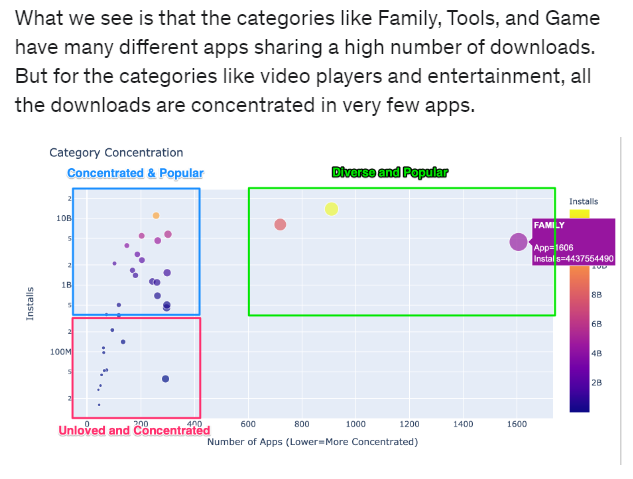

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [ ]:
df_apps_clean["Genres"].nunique()

114

In [ ]:
df_apps_clean.Genres.value_counts().sort_values(ascending=False)[:15]

Tools               718
Entertainment       467
Education           429
Productivity        301
Personalization     298
Finance             296
Lifestyle           296
Medical             292
Action              292
Sports              266
Photography         263
Business            262
Communication       257
Health & Fitness    243
News & Magazines    204
Name: Genres, dtype: int64

In [ ]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


In [ ]:
num_genres

Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink                94
Educational                 93
Adventur

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [ ]:
fig = px.bar(x = num_genres.index[:15],
             y= num_genres.values[:15],
             title="Top Genres",
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
fig.update_layout(yaxis_title='Number of Apps ',xaxis_title="Genre", coloraxis_showscale=False)
fig.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [ ]:
df_apps_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [ ]:
# Using as_index=False we push all the data into columns rather than end up with our Categories as the index
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({"App": pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [ ]:
fig = px.bar(x = df_free_vs_paid.Category,
             y= df_free_vs_paid.App,
             title="Free vs Paid Apps by Category",
             color=df_free_vs_paid.Type,
             barmode="group")

fig.update_layout(yaxis_title='Number of Apps',
                  xaxis_title="Category",
                  # yaxis=dict(type='log'),
                  # alt xaxis={'categoryorder':'total descending'}
                  xaxis_tickangle=90)

fig.update_xaxes(categoryorder='total descending')
fig.update_yaxes(type='log')

fig.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


In [ ]:
# Using as_index=False we push all the data into columns rather than end up with our Categories as the index
box = px.box(df_apps_clean, x="Type", y="Installs",
             color = "Type", 
             points = "all",
             title = "How Many Downloads are Paid Apps giving up?",
             notched = True)

box.update_yaxes(type='log')
# box.update_layout(yaxis=dict(type='log'))
box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [ ]:
df_paid_apps = df_apps_clean[df_apps_clean["Type"]== "Paid"]
box = px.box(df_paid_apps, 
             x="Category",
             y="Revenue_Estimate",
             title = "How Much Paid Apps Earn?")

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [ ]:
df_paid_apps.Price.median()

2.99

In [ ]:
df_paid_apps = df_apps_clean[df_apps_clean["Type"]== "Paid"]
box = px.box(df_paid_apps, 
             x="Category",
             y="Price",
             title = "App pricing by category")

box.update_layout(xaxis_title='Category',
                  yaxis_title='Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
 
box.show()